In [1]:
!pip install rake-nltk

In [2]:
import pandas as pd
import re

In [3]:
# 유튜브 크롤링 파일 로드
path = '/home/lab10/official_youtube/pre_comment/'

In [4]:
comment_file = f'prepro_comments_num_GOT7.csv'     #aespa
data = pd.read_csv(path+comment_file, encoding='utf-8', header=None)
data.columns = ['comment','like','lang']
print(len(data))
data.head()


687679


,comment,like,lang
0,i remember got7 was my first favorite boy grou...,3800,(en)
1,ok i m not crying they ll come back and shine ...,998,(en)
2,for everyone s info got7 did not disb nd they ...,596,(en)
3,i m not a fan of got7 but they were wonderful ...,453,(en)
4,sinto tanta falta de vcs juntinhos mas entendo...,48,(etc)


In [5]:
data.like.describe(percentiles=[0.97])

count    687679.000000
mean         15.661322
std         136.866867
min           0.000000
50%           0.000000
97%          85.000000
max       23000.000000
Name: like, dtype: float64

In [6]:
# 좋아요 갯수 일정갯수 이상 만 
# idx=data[data['like']<=323].index              #좋아요 갯수 상위 15000 정도 이상 댓글만 남김
# data.drop(idx, inplace=True)

data_2 = data[data.like >=100]

In [7]:
len(data_2)

18548

In [8]:
data_ko = pd.DataFrame([kor[:1] for kor in data_2.values if kor[2] == '(ko)'], columns=['comment'])
data_en = pd.DataFrame([en[:1] for en in data_2.values if en[2] == '(en)'], columns=['comment'])
data_en.comment.values

array(['i remember got7 was my first favorite boy group during the fly era seeing them work hard keep their heads down to now being free to do what they want it s inspiring',
       'ok i m not crying they ll come back and shine brighter than before',
       'for everyone s info got7 did not disb nd they just left jype and signed to different agencies to pursue their solo careers and they still hold the right for the name got7 they assured and promised us that they will come back as a group as got7 soon check out their latest group single encore it was released after they left jype',
       ..., 'i got a notif from this but it was published in 2012 what',
       'the beginning of everything can we have an anniversary mv or smth',
       'still waiting for slot machine to come out'], dtype=object)

In [9]:
for i in range(len(data_en.comment)):
    data_en.comment[i] = str(data_en.comment[i])


In [10]:
# 숫자제거 / 밑줄 제외한 특수문자 제거
p = re.compile("[0-6]+")
z = re.compile("[8-9]+")
q = re.compile("\W+")
r = re.compile('[^a-zA-Z7]+')

en = []
for i in data_en.comment.values:
    tokens = re.sub(p," ",i)
    tokens = re.sub(z," ",tokens)
    tokens = re.sub(q," ",tokens)
    tokens = re.sub(r," ", tokens)
    en.append(tokens)
len(en)

17359

In [11]:
en[:2]

['i remember got7 was my first favorite boy group during the fly era seeing them work hard keep their heads down to now being free to do what they want it s inspiring',
 'ok i m not crying they ll come back and shine brighter than before']

In [12]:
# 불용어 제거
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [13]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /home/lab10/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/lab10/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/lab10/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [14]:
stop_words = set(stopwords.words('english')) 
stop_words.update(('song','group','songs','youtube','views','time','https','girl','girls','people','yes','lol','video','part','member','members', 'look','way','guys','fans','fan'))

res=[]
for i in range(len(en)):
    word_tokens = word_tokenize(en[i])

    result = []
    for w in word_tokens: 
        if w not in stop_words: 
            result.append(w) 
    res.append(result)

# print(word_tokens) 
print(res[:10])
print(len(res))

[['remember', 'got7', 'first', 'favorite', 'boy', 'fly', 'era', 'seeing', 'work', 'hard', 'keep', 'heads', 'free', 'want', 'inspiring'], ['ok', 'crying', 'come', 'back', 'shine', 'brighter'], ['everyone', 'info', 'got7', 'disb', 'nd', 'left', 'jype', 'signed', 'different', 'agencies', 'pursue', 'solo', 'careers', 'still', 'hold', 'right', 'name', 'got7', 'assured', 'promised', 'us', 'come', 'back', 'got7', 'soon', 'check', 'latest', 'single', 'encore', 'released', 'left', 'jype'], ['got7', 'wonderful', 'artists', 'hope', 'happy', 'forever', 'cry', 'wonderful'], ['figured', 'us', 'moved', 'tears', 'everytime', 'watch', 'virtual', 'hug'], ['always', 'baby', 'birds'], ['g', '7there', 'ot7', 'always', '7'], ['make', 'cry'], ['ohmaigaaaaa', 'young', 'bambam', 'baby'], ['7', 'nothing', '7', 'got7', 'started', '7', 'always', '7', 'til', 'end', '7', '7', 'forever', 'got7', 'debuted', '7', 'years', 'ago', 'day', '7', 'years', 'ago', 'today', 'journey', 'seven', 'boys', 'begun', '7years', 'fille

In [15]:
en_pos = []
for i in range(len(res)):
    tokens_pos = nltk.pos_tag(res[i])
    en_pos.append(tokens_pos)
en_pos[:2]

[[('remember', 'VB'),
  ('got7', 'NN'),
  ('first', 'RB'),
  ('favorite', 'JJ'),
  ('boy', 'NN'),
  ('fly', 'NN'),
  ('era', 'NN'),
  ('seeing', 'VBG'),
  ('work', 'NN'),
  ('hard', 'JJ'),
  ('keep', 'VB'),
  ('heads', 'NNS'),
  ('free', 'JJ'),
  ('want', 'VBP'),
  ('inspiring', 'VBG')],
 [('ok', 'JJ'),
  ('crying', 'VBG'),
  ('come', 'VBN'),
  ('back', 'RB'),
  ('shine', 'JJ'),
  ('brighter', 'NN')]]

In [16]:
# 명사는 NN을 포함하고 있음을 알 수 있음
en_NN=[]
for i in range(len(en_pos)):
    NN_words = []
    for word, pos in en_pos[i]:
        if 'NN' in pos:
            NN_words.append(word)
    en_NN.extend(NN_words)
en_NN[:2]

['got7', 'boy']

In [17]:
#9. 빈도분석
from collections import Counter
c = Counter(en_NN) # input type should be a list of words (or tokens)
k = 20
print(c.most_common(k)) # 빈도수 기준 상위 k개 단어 출력

[('jackson', 3132), ('got7', 2348), ('jb', 2154), ('mark', 2081), ('jinyoung', 2030), ('bambam', 1502), ('youngjae', 1222), ('yugyeom', 1050), ('love', 885), ('dance', 613), ('voice', 586), ('everyone', 540), ('jaebum', 472), ('cute', 460), ('life', 389), ('day', 383), ('please', 382), ('heart', 374), ('jyp', 362), ('ahgase', 340)]


In [18]:
#wordclound
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

noun_text = ''
for word in en_NN:
    noun_text = noun_text +' '+word


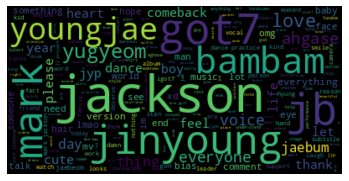

In [19]:
wordcloud = WordCloud(max_font_size=60, relative_scaling=.5).generate(noun_text) # generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('//home/lab10/official_youtube/wordcloud_GOT7.png')

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize


In [21]:
## 3단어 이하 짧은 단어 제거
 # remove words less than three letters
# print(res[1])
# for word in res[1]:
#     print(word)
en_sent_less3=[]
for i in range(len(res)):
    tokens = [word for word in res[i] if len(word) >= 3]
    en_sent_less3.append(tokens)
en_sent_less3[:2]


[['remember',
  'got7',
  'first',
  'favorite',
  'boy',
  'fly',
  'era',
  'seeing',
  'work',
  'hard',
  'keep',
  'heads',
  'free',
  'want',
  'inspiring'],
 ['crying', 'come', 'back', 'shine', 'brighter']]

In [22]:
en_sent =[]
for i in range(len(en_sent_less3)):
    temp=" ".join(en_sent_less3[i])
    en_sent.append(temp)
en_sent[:15]

['remember got7 first favorite boy fly era seeing work hard keep heads free want inspiring',
 'crying come back shine brighter',
 'everyone info got7 disb left jype signed different agencies pursue solo careers still hold right name got7 assured promised come back got7 soon check latest single encore released left jype',
 'got7 wonderful artists hope happy forever cry wonderful',
 'figured moved tears everytime watch virtual hug',
 'always baby birds',
 '7there ot7 always',
 'make cry',
 'ohmaigaaaaa young bambam baby',
 'nothing got7 started always til end forever got7 debuted years ago day years ago today journey seven boys begun 7years filled struggles success happiness7 years unending love care affection sacrifices years millions birds loves always loves past 7years magical gone lot countless emotions happy proud 7years many years together boys spending youth best thing ever done forever best thing words describe proud growth artists seeing achieve day day makes proud see persons t

In [23]:
"""# 빈도수 계산을 위한 텍스트 데이터 벡터화
 - BoW 단어를 특성 벡터로 변환
 - TF-IDF 를 사용하여 단어 적합성 평가
"""

# BoW 모델로 벡터화
count = CountVectorizer(ngram_range=(3,6),
                        max_df = .1,
                        max_features=5000, stop_words=None)
docs = en_sent
bag = count.fit_transform(docs)

In [24]:
# TF_IDF 벡터화

tfidf = TfidfVectorizer(ngram_range=(3,6), # 유니그램 바이그램으로 사용
                        min_df = 3, # 3회 미만으로 등장하는 토큰은 무시
                        max_df =0.95 # 많이 등장한 단어 5%의 토큰도 무시
                        )
docs_tf = tfidf.fit_transform(docs)

In [25]:
"""# 잠재 디리클레 할당을 사용한 토픽 모델링"""

# LDA 사용 (BoW 기반)
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components = 6,
                                random_state = 1,
                                learning_method = 'batch')

X_topics = lda.fit_transform(bag)

In [26]:
# 결과 분석을 위해 각 토픽 당 중요 단어 10개 출력 (BoW 기반)
n_top_word = 5
feature_name = count.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
  print("토픽 %d:" % (topic_idx+1))
  print([feature_name[i] for i in topic.argsort()[:-n_top_word - 1: -1]])

토픽 1:
['cutest thing ever', 'please take care', 'refund high school', 'love got7 much', 'got7 got7 got7']
토픽 2:
['mark looks like', 'one absolutely one', 'bang bang bang', 'deep ass voice', 'jackson love got7']
토픽 3:
['park jinyoung choi', 'bambam kim yugyeom', 'jackson park jinyoung', 'choi youngjae bambam', 'jackson park jinyoung choi']
토픽 4:
['one gon talk', 'gaon chart music', 'got7 first pop', 'seoul music awards', 'chart music awards']
토픽 5:
['gae park gae', 'jinyoung youngjae bambam', 'mark jackson jinyoung', 'jackson jinyoung youngjae', 'wang gae park gae']
토픽 6:
['one literally one', 'jinyoung looks like', 'jackson looks tired', 'take good care', 'thank got7 thank']


In [27]:
# LDA 사용 (tf-idf 기반)
lda_tfidf = LatentDirichletAllocation(n_components = 6,
                                      random_state = 1,
                                      learning_method = 'batch')

X_topics = lda_tfidf.fit_transform(docs_tf)

In [28]:
# 결과 분석을 위해 각 토픽 당 중요 단어 10개 출력 (tf-idf 기반)
n_top_word = 5
feature_name = count.get_feature_names()
for topic_idx, topic in enumerate(lda_tfidf.components_):
  print("토픽 %d:" % (topic_idx+1))
  print([feature_name[i] for i in topic.argsort()[:-n_top_word - 1: -1]])


토픽 1:
['got7 third pop reached', 'leader slash composer producer', 'head toejinyoung beanie jacket black pantsyoungjae', 'forget vote starple app', 'category top chinese music']
토픽 2:
['jackson park jin young choi', 'many awards let talk', 'lee deo moons', 'jackson jinyoung youngjae bambam yugyeom', 'got7 third pop']
토픽 3:
['jackson park jinyoung choi youngjae', 'disk award rookie award', 'nal apeuge hae', 'naega wae iri deo apeunji dojeohi', 'awards disc bonsang golden']
토픽 4:
['came bowling release stress morning', 'always put got7', 'jackson participating japanese', 'haneun pyojeongi nal apeuge hae', 'done want always stay healthy']
토픽 5:
['forget vote starple', 'jbmarkjacksonpark jinyoungchoi youngjaebambamkim yugyeom', 'due packed schedule solo korea', 'give speeches languages including mandarin cantonese', 'mole right eye watch interviews']
토픽 6:
['jackson needs youngjae', 'omg thank much', 'always good bad', 'handsome oneyugyeom handsome', 'east coast even said bts controls']


##Rake_nltk 라이브러리

https://github.com/csurfer/rake-nltk


## Rake_nltk 이론적 배경


https://www.researchgate.net/publication/227988510_Automatic_Keyword_Extraction_from_Individual_Documents

In [29]:
'''
from rake_nltk import Rake

# raw= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/[공유] Mulcam_Army 공유폴더!/크롤링 한 자료/youtube/영상별 댓글/comments_youtube_aespa.csv',header=None)
# raw.columns=['comments','likes']
# raw

en_sent[:10]

text=". ".join(en_sent)
# text

# # Uses stopwords for english from NLTK, and all puntuation characters by
# # default
# r = Rake()

# # Extraction given the text.
# r.extract_keywords_from_text(<text to process>)

# # Extraction given the list of strings where each string is a sentence.
# r.extract_keywords_from_sentences(<list of sentences>)

# # To get keyword phrases ranked highest to lowest.
# r.get_ranked_phrases()

# # To get keyword phrases ranked highest to lowest with scores.
# r.get_ranked_phrases_with_scores()

r=Rake()
r.extract_keywords_from_text(text)
r.get_ranked_phrases_with_scores()[:10]

r1=Rake()
r1.extract_keywords_from_sentences(en_sent)
r1.get_ranked_phrases_with_scores()[:10]
'''

'\nfrom rake_nltk import Rake\n\n# raw= pd.read_csv(\'/content/drive/MyDrive/Colab Notebooks/[공유] Mulcam_Army 공유폴더!/크롤링 한 자료/youtube/영상별 댓글/comments_youtube_aespa.csv\',header=None)\n# raw.columns=[\'comments\',\'likes\']\n# raw\n\nen_sent[:10]\n\ntext=". ".join(en_sent)\n# text\n\n# # Uses stopwords for english from NLTK, and all puntuation characters by\n# # default\n# r = Rake()\n\n# # Extraction given the text.\n# r.extract_keywords_from_text(<text to process>)\n\n# # Extraction given the list of strings where each string is a sentence.\n# r.extract_keywords_from_sentences(<list of sentences>)\n\n# # To get keyword phrases ranked highest to lowest.\n# r.get_ranked_phrases()\n\n# # To get keyword phrases ranked highest to lowest with scores.\n# r.get_ranked_phrases_with_scores()\n\nr=Rake()\nr.extract_keywords_from_text(text)\nr.get_ranked_phrases_with_scores()[:10]\n\nr1=Rake()\nr1.extract_keywords_from_sentences(en_sent)\nr1.get_ranked_phrases_with_scor

## flashtext

In [30]:
'''
!pip install flashtext

from flashtext import KeywordProcessor
keyword_processor = KeywordProcessor()
keyword_processor.add_keywM
keywords    
'''

'\n!pip install flashtext\n\nfrom flashtext import KeywordProcessor\nkeyword_processor = KeywordProcessor()\nkeyword_processor.add_keywM\nkeywords    \n'

## yake

In [31]:
!pip install git+https://github.com/LIAAD/yake

  Cloning https://github.com/LIAAD/yake to /tmp/pip-req-build-8gsa2izm
  Running command git clone -q https://github.com/LIAAD/yake /tmp/pip-req-build-8gsa2izm
  Resolved https://github.com/LIAAD/yake to commit f35bbc0e2f47e733233a182f69ea3aed4a82f9a5


In [32]:
import yake

In [33]:
a=". ".join(en_sent)

In [34]:
language = "en"
max_ngram_size = 1
deduplication_thresold = 0.9
deduplication_algo = 'seqm'
windowSize = 3
numOfKeywords = 20

custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(a)

for kw in keywords:
    print(kw)

('jackson', 3.134333022961243e-05)
('love', 5.506810261690121e-05)
('mark', 5.725815004586449e-05)
('jinyoung', 5.9990759445033885e-05)
('youngjae', 6.51884100788834e-05)
('bambam', 7.161160663870665e-05)
('yugyeom', 9.567887042826029e-05)
('good', 0.0002876423890126877)
('cute', 0.00035418155522794236)
('dance', 0.0003703689724687219)
('voice', 0.0004022612186968354)
('make', 0.0004927558091596826)
('feel', 0.0005196265469727387)
('ahgase', 0.0005253031032747729)
('ahgases', 0.0005411413877956204)
('hard', 0.0005428514394475983)
('jaebum', 0.0005464415371774288)
('omg', 0.0005946231412915432)
('bias', 0.000656721087310064)
('happy', 0.0006848234596891644)


## Pke

In [35]:
!pip install git+https://github.com/boudinfl/pke.git
!pip install spacy
!python3 -m spacy download en

  Cloning https://github.com/boudinfl/pke.git to /tmp/pip-req-build-sl_zka94
  Running command git clone -q https://github.com/boudinfl/pke.git /tmp/pip-req-build-sl_zka94
  Resolved https://github.com/boudinfl/pke.git to commit 485c93879988f5b0290d241ad484c4fae7454530
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     |████████████████████████████████| 13.6 MB 1.7 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [36]:
import pke
import spacy
# nlp = spacy.load("en_core_web_sm")

In [ ]:
for i in range(len(en_sent)):

    # initialize keyphrase extraction model, here TopicRank
    extractor = pke.unsupervised.TopicRank()

    # load the content of the document, here document is expected to be in raw
    # # format (i.e. a simple text file) and preprocessing is carried out using spacy
    extractor.load_document(input=en_sent[i], language='en_core_web_sm')
    extractor.candidate_selection(pos={'NOUN'})
    extractor.candidate_weighting(threshold=0.74,
                                  method='average')
    keyphrase_score=[]
    for (keyphrase, score) in extractor.get_n_best(n=1, stemming=True):
        print(keyphrase, score)
        keyphrase_score.extend((keyphrase, score))
        

era 0.30398345270965454
crying 1.0
info got7 disb 0.287541402960171
artists 1.0
hug 0.5
baby birds 1.0
ot7 1.0
cry 1.0
bambam baby 0.5
years 0.07450393766817814
challenge 1.0
7years love years 0.278673897953777
companies 0.10850353964099614
jype ahgases comforts 0.5
love 1.0
endit 0.39361741945785217
chapters 0.40116627157873813
encore 0.5
never7 nothinggot7foreverwe 1.0
believe years 1.0
seconds 0.3962987032710889
family 0.4153842238342965
concerts 0.5
neveryou dream 1.0
sorry manage 0.09620046662957013
bamkim 1.0
end gon 0.23762510336922862
believe years 0.5
respect idols 0.4111894277167934
company 0.39361741945785217
day 0.20447735113231258
friendship bond 1.0
fandom 0.5
hope future 0.4042545641199323
support 1.0
perfectigot7 perfectgot7 1.0
funniest 0.5
story 1.0
hair phasejackson 0.23576287890912903
sleep 0.5
jype got7 0.4086231483811135
igot7 0.5
kids 0.29032395939357447
miss got7 1.0
yoyagasssy 1.0
years love years 0.39829318283373194
ahgase 0.14843828547138907
accusations 0.5
l

In [ ]:
keyphrase_score

# word2vec

## Word2Vec 단어 벡터 표현

## K-means


In [ ]:
# 텍스트 단어들의 어근 원형을 추출하기 위해 함수 생성
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string

# Tf-idf 벡터화시키면서 cusotmized해준 토큰화+어근추출 방식 tokenizer인자에 넣어주기
# 벡터화시킬 Tf-idf 도구 옵션 추가해서 구축
# 1,2gram적용, 빈도수 0.05이하, 0.85이상의 빈도수 단어들 제거
tfidf_vect = TfidfVectorizer(ngram_range=(1,2),
                            min_df=0.05, max_df=0.85)
# fit_transform으로 위에서 구축한 도구로 텍스트 벡터화
ftr_vect = tfidf_vect.fit_transform(en_sent)

In [ ]:
# K-means로 6개 군집으로 문서 군집화시키기
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, max_iter=10000, random_state=42)
# 비지도 학습이니 feature로만 학습시키고 예측
cluster_label = kmeans.fit_predict(ftr_vect)

# 군집화한 레이블값들을 document_df 에 추가하기
data_en['label'] = cluster_label
print(data_en.sort_values(by=['label']))

In [ ]:
# 문서의 feature(단어별) cluster_centers_확인해보자
cluster_centers = kmeans.cluster_centers_
print(cluster_centers.shape)
print(cluster_centers)
# shape의 행은 클러스터 레이블, 열은 벡터화 시킨 feature(단어들)

In [ ]:
def get_cluster_details(cluster_model, cluster_data, feature_names,
                       cluster_num, top_n_features=5):
    cluster_details = {}
    # 각 클러스터 레이블별 feature들의 center값들 내림차순으로 정렬 후의 인덱스를 반환
    center_feature_idx = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    # 개별 클러스터 레이블별로 
    for cluster_num in range(cluster_num):
        # 개별 클러스터별 정보를 담을 empty dict할당
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # 각 feature별 center값들 정렬한 인덱스 중 상위 5개만 추출
        top_ftr_idx = center_feature_idx[cluster_num, :top_n_features]
        top_ftr = [feature_names[idx] for idx in top_ftr_idx]
        # top_ftr_idx를 활용해서 상위 5개 feature들의 center값들 반환
        # 반환하게 되면 array이기 떄문에 리스트로바꾸기
        top_ftr_val = cluster_model.cluster_centers_[cluster_num, top_ftr_idx].tolist()
        
        # cluster_details 딕셔너리에다가 개별 군집 정보 넣어주기
        cluster_details[cluster_num]['top_features'] = top_ftr
        cluster_details[cluster_num]['top_featrues_value'] = top_ftr_val
        # 해당 cluster_num으로 분류된 파일명(문서들) 넣어주기
        comment = cluster_data[cluster_data['label']==cluster_num]['comment']
        # filenames가 df으로 반환되기 떄문에 값들만 출력해서 array->list로 변환
        comment = comment.values.tolist()
        cluster_details[cluster_num]['comment'] = comment
    
    return cluster_details

def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print(f"#####Cluster Num: {cluster_num}")
        print()
        print("상위 5개 feature단어들:\n", cluster_detail['top_features'])
        print()
        print(f"Cluster {cluster_num}으로 분류된 문서들:\n{cluster_detail['comment'][:5]}")
        print('-'*20)

feature_names = tfidf_vect.get_feature_names()
cluster_details = get_cluster_details(cluster_model=kmeans,
                                     cluster_data=data_en,
                                     feature_names=feature_names,
                                     cluster_num=6,
                                     top_n_features=10)
print_cluster_details(cluster_details)

In [ ]:
data_en.head()

In [ ]:
# 클러스터링된 문서들 중에서 특정 문서를 하나 선택한 후 비슷한 문서 추출
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:

hotel_idx = data_en[data_en['label']==1].index
print("호텔 카테고리로 클러스터링된 문서들의 인덱스:\n",hotel_idx)
print()
# 호텔 카테고리로 클러스터링 된 문서들의 인덱스 중 하나 선택해 비교 기준으로 삼을 문서 선정
comparison_doc = data_en.iloc[hotel_idx[0]]['comment']
print("##유사도 비교 기준 문서 이름:",comparison_doc,'##')
print()

# 위에서 추출한 호텔 카테고리로 클러스터링된 문서들의 인덱스 중 0번인덱스(비교기준문서)제외한
# 다른 문서들과의 유사도 측정
similarity = cosine_similarity(ftr_vect[hotel_idx[0]], ftr_vect[hotel_idx])
# print(similarity)


In [ ]:
# 비교기준 문서와 다른 문서들간의 유사도 살펴보기
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# array 내림차순으로 정렬한 후 인덱스 반환 [:,::-1] 모든행에 대해서 열을 내림차순으로!
sorted_idx = similarity.argsort()[:,::-1]
# 비교문서 당사자는 제외한 인덱스 추출
sorted_idx = sorted_idx[:, 1:]

# 유사도가 큰 순으로 hotel_idx(label=1인 즉, 호텔과관련된 내용의 문서이름들의 index들)에서 재 정렬 
# index로 넣으려면 1차원으로 reshape해주기!
hotel_sorted_idx = hotel_idx[sorted_idx.reshape(-1,)]
# 유사도 행렬값들을 유사도가 큰 순으로 재정렬(비교 문서 당사자는 제외)
hotel_sim_values = np.sort(similarity.reshape(-1,))[::-1]
hotel_sim_values = hotel_sim_values[1:]
# 이렇게 되면 비교문서와 가장 유사한 순으로 '해당문서의index-유사도값' 으로 동일한 위치가 매핑된 두 개의 array!
# 그래서 그대로 데이터프레임의 각 칼럼으로 넣어주기
# print(hotel_sorted_idx)
# print(hotel_sim_values)
print()
print("길이 비교", len(hotel_sorted_idx), len(hotel_sim_values))
print()
# 빈 데이터프레임 생성
hotel_sim_df = pd.DataFrame()
# hotel_sorted_idx 와 hotel_sim_values 매핑시킨 array임
hotel_sim_df['comment'] = data_en.iloc[hotel_sorted_idx]['comment']
hotel_sim_df['similarity'] = hotel_sim_values

# plt.figure(figsize=(15,10))
# sns.barplot(data=hotel_sim_df[:100], x='similarity', y='comment')
# plt.title(comparison_doc)

https://techblog-history-younghunjo1.tistory.com/114

## Text Rank


In [ ]:
'''
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import time
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import time
time.sleep(1)
def get_TR(C, d, TR, n, decimal):
    new_TR = deepcopy(TR)
    for idx in range(n):
        res = 0
        for near_idx in range(n):
            if C[idx][near_idx] == 0: continue
            res += C[idx][near_idx] / sum(C[near_idx]) * new_TR[near_idx]
        res = (1-d)/n + d * res
        new_TR[idx] = round(res, decimal)
    return new_TR

def TextRank(C,d, TR, N,decimal):
    new_TR = deepcopy(TR)
    for x in range(N):
        res = 0 
        for y in range(N):
            res += C[x][y] / sum(C[y]) * new_TR[y]
        res = (1-d)/N +d * res
        new_TR[x] = round(res, decimal)
    return new_TR

def update_TR(C, d=1, stp=1, decimal=2):
    """
    step : 반복 횟수
    decimal : TR 값 소수점 표출 자리수 지정
    """
    n = C.shape[0]
    TR = [1/n for _ in range(n)]
    TRs = [TR]
    errors = []
    for _ in range(step):
        new_TR = get_TR(C, d, TR, n, decimal)
        error = sum([abs(TR[i] - new_TR[i]) for i in range(n)])
        errors.append(error)
        TRs.append(new_TR)
        TR = new_TR
    return TRs, errors

Text =  np.array([[0, 0.2, 0, 0.3],
                  [0.2, 0, 0.4, 0],
                  [0, 0.4, 0, 0],
                  [0.3, 0, 0, 0]])
N=Text.shape[0]
TRs, errors = update_TR(Text, d=0.85, step=10, decimal=4)

# print(TRs)
# for TR in TRs:
#      print(TR)
# print()
print(f"final TR : {TRs[-1]}")
print()

plt.plot(errors)
plt.xlabel('Number of iterations')
plt.ylabel('Error rate')
plt.show()
'''

In [ ]:
# text='''\
# Maria Sharapova has basically no friends as tennis players on the WTA Tour. \
# The Russian player has no problems in openly speaking about it and in a recent interview she said: \
# 'I don't really hide any feelings too much. I think everyone knows this is my job here. \
# When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every \
# single person whether they're in the locker room or across the net. So I'm not the one to strike up \
# a conversation about the weather and know that in the next few minutes I have to go and try to win \
# a tennis match. I'm a pretty competitive girl. I say my hellos, but I'm not sending any players \
# flowers as well. Uhm, I'm not really friendly or close to many players. I have not a lot of friends \
# away from the courts.' When she said she is not really close to a lot of players, is that something \
# strategic that she is doing? Is it different on the men's tour than the women's tour? 'No, not at all. \
# I think just because you're in the same sport doesn't mean that you have to be friends with everyone \
# just because you're categorized, you're a tennis player, so you're going to get along with tennis players. \
# I think every person has different interests. I have friends that have completely different jobs and interests, \
# and I've met them in very different parts of my life. I think everyone just thinks because we're tennis players \
# we should be the greatest of friends. But ultimately tennis is just a very small part of what we do. \
# There are so many other things that we're interested in, that we do.' ALSO READ: Maria Sharapova reveals \
# how tennis keeps her motivated.'''

# # stopwords = nltk.corpus.stopwords.words('english')
# # stopwords.extend(['.'])

# # sentences_org = nltk.sent_tokenize(text)
# # sentences = []
# # print('데이터 전처리 시작...')
# # for sentence in sentences_org:
# #     words = nltk.word_tokenize(sentence)
# #     words = [word for word in words if word not in stopwords] # 불용어 제거
# #     words = [word.lower() for word in words] # 소문자 변환
# #     sentences.append(' '.join(words))
# # print('데이터 전처리 종료...')
# # print()
'''
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(en_sent).toarray()
n = tfidf_matrix.shape[0]
C = np.zeros(shape=(n, n))
print('유사도 행렬(C) 계산 시작...')
for i in range(n):
    for j in range(n):
        sim = cosine_similarity(tfidf_matrix[i:i+1], tfidf_matrix[j:j+1])
        C[i][j] = sim
        C[j][i] = sim
np.fill_diagonal(C, 0)
print('유사도 행렬(C) 계산 종료...')
print()

# print(C)
# print()

print('TR 업데이트 시작...')
TRs, errors = update_TR(C, d=0.85, step=10, decimal=3)
print('TR 업데이트 종료...')
print()

# for TR in TRs:
#     print(TR)
# print()

final_TR = TRs[-1]
print(f"final TR : {final_TR}")
print()

imp_sentence_idx = np.argmax(final_TR)
print(f"most important sentence : {en[imp_sentence_idx]}")
print()

plt.plot(errors)
plt.xlabel('Number of iterations')
plt.ylabel('Error rate')
plt.show()
'''

In [ ]:
from collections import Counter

def scan_vocabulary(sents, tokenize, min_count=2):
    counter = Counter(w for sent in sents for w in tokenize(sent))
    counter = {w:c for w,c in counter.items() if c >= min_count}
    idx_to_vocab = [w for w, _ in sorted(counter.items(), key=lambda x:-x[1])]
    vocab_to_idx = {vocab:idx for idx, vocab in enumerate(idx_to_vocab)}
    return idx_to_vocab, vocab_to_idx
    
from collections import defaultdict

def cooccurrence(tokens, vocab_to_idx, window=2, min_cooccurrence=2):
    counter = defaultdict(int)
    for s, tokens_i in enumerate(tokens):
        vocabs = [vocab_to_idx[w] for w in tokens_i if w in vocab_to_idx]
        n = len(vocabs)
        for i, v in enumerate(vocabs):
            if window <= 0:
                b, e = 0, n
            else:
                b = max(0, i - window)
                e = min(i + window, n)
            for j in range(b, e):
                if i == j:
                    continue
                counter[(v, vocabs[j])] += 1
                counter[(vocabs[j], v)] += 1
    counter = {k:v for k,v in counter.items() if v >= min_cooccurrence}
    n_vocabs = len(vocab_to_idx)
    return dict_to_mat(counter, n_vocabs, n_vocabs)
from scipy.sparse import csr_matrix

def dict_to_mat(d, n_rows, n_cols):
    rows, cols, data = [], [], []
    for (i, j), v in d.items():
        rows.append(i)
        cols.append(j)
        data.append(v)
    return csr_matrix((data, (rows, cols)), shape=(n_rows, n_cols))
def word_graph(sents, tokenize=None, min_count=2, window=2, min_cooccurrence=2):
    idx_to_vocab, vocab_to_idx = scan_vocabulary(sents, tokenize, min_count)
    tokens = [tokenize(sent) for sent in sents]
    g = cooccurrence(tokens, vocab_to_idx, window, min_cooccurrence, verbose)
    return g, idx_to_vocab
import numpy as np
from sklearn.preprocessing import normalize

def pagerank(x, df=0.85, max_iter=30):
    assert 0 < df < 1

    # initialize
    A = normalize(x, axis=0, norm='l1')
    R = np.ones(A.shape[0]).reshape(-1,1)
    bias = (1 - df) * np.ones(A.shape[0]).reshape(-1,1)

    # iteration
    for _ in range(max_iter):
        R = df * (A * R) + bias

    return R
def textrank_keyword(sents, tokenize, min_count, window, min_cooccurrence, df=0.85, max_iter=30, topk=30):
    g, idx_to_vocab = word_graph(sents, tokenize, min_count, window, min_cooccurrence)
    R = pagerank(g, df, max_iter).reshape(-1)
    idxs = R.argsort()[-topk:]
    keywords = [(idx_to_vocab[idx], R[idx]) for idx in reversed(idxs)]
    return keywords

from collections import Counter
from scipy.sparse import csr_matrix
import math

def sent_graph(sents, tokenize, similarity, min_count=2, min_sim=0.3):
    _, vocab_to_idx = scan_vocabulary(sents, tokenize, min_count)

    tokens = [[w for w in tokenize(sent) if w in vocab_to_idx] for sent in sents]
    rows, cols, data = [], [], []
    n_sents = len(tokens)
    for i, tokens_i in enumerate(tokens):
        for j, tokens_j in enumerate(tokens):
            if i >= j:
                continue
            sim = similarity(tokens_i, tokens_j)
            if sim < min_sim:
                continue
            rows.append(i)
            cols.append(j)
            data.append(sim)
    return csr_matrix((data, (rows, cols)), shape=(n_sents, n_sents))

def textrank_sent_sim(s1, s2):
    n1 = len(s1)
    n2 = len(s2)
    if (n1 <= 1) or (n2 <= 1):
        return 0
    common = len(set(s1).intersection(set(s2)))
    base = math.log(n1) + math.log(n2)
    return common / base

def cosine_sent_sim(s1, s2):
    if (not s1) or (not s2):
        return 0

    s1 = Counter(s1)
    s2 = Counter(s2)
    norm1 = math.sqrt(sum(v ** 2 for v in s1.values()))
    norm2 = math.sqrt(sum(v ** 2 for v in s2.values()))
    prod = 0
    for k, v in s1.items():
        prod += v * s2.get(k, 0)
    return prod / (norm1 * norm2)
def textrank_keysentence(sents, tokenize, min_count, similarity, df=0.85, max_iter=30, topk=5):
    g = sent_graph(sents, tokenize, min_count, min_sim, similarity)
    R = pagerank(g, df, max_iter).reshape(-1)
    idxs = R.argsort()[-topk:]
    keysents = [(idx, R[idx], sents[idx]) for idx in reversed(idxs)]
    return keysents

In [ ]:
!pip install textrank

In [ ]:
'''
from textrank import KeywordSummarizer
def nltk_tokenize(sent):
    words = nltk.pos_tag(sent, join=True)
    words = [w for w in words if ('/NN' in w or '/XR' in w or '/VA' in w or '/VV' in w)]
    return words

keyword_extractor = KeywordSummarizer(
    tokenize = nltk_tokenize,
    window = -1,
    verbose = False
)

keywords = keyword_extractor.summarize(res, topk=30)
    
def komoran_tokenize(sent):
    return komoran.pos(sent, join=True)

keyword_extractor = KeywordSummarizer(tokenize = komoran_tokenize, window = -1)
keywords = keyword_extractor.summarize(sents, topk=30)

def komoran_tokenize(sent):
    words = komoran.pos(sent, join=True)
    words = [w for w in words if ('/NN' in w or '/XR' in w or '/VA' in w or '/VV' in w)]
    return words

keyword_extractor = KeywordSummarizer(tokenize = komoran_tokenize, window = 2)
keywords = keyword_extractor.summarize(sents, topk=30)

from textrank import KeysentenceSummarizer

summarizer = KeysentenceSummarizer(tokenize = komoran_tokenize, min_sim = 0.5)
keysents = summarizer.summarize(sents, topk=10)

summarizer = KeysentenceSummarizer(tokenize = komoran_tokenizer, min_sim = 0.3)
keysents = summarizer.summarize(sents, topk=3)


def subword_tokenizer(sent, n=3):
    def subword(token, n):
        if len(token) <= n:
            return [token]
        return [token[i:i+n] for i in range(len(token) - n)]
    return [sub for token in sent.split() for sub in subword(token, n)]

subword_tokenizer('이것은 부분단어의 예시입니다 짧은 어절은 그대로 나옵니다')
# ['이것은', '부분단', '분단어', '단어의', '예시입', '시입니', '입니다', '짧은', '어절은', '그대로', '나옵니', '옵니다']

summarizer = KeysentenceSummarizer(tokenize = subword_tokenizer, min_sim = 0.3)
keysents = summarizer.summarize(sents, topk=3)


summarizer.R

import numpy as np

bias = np.ones(len(sents))
bias[-1] = 10
keysents = summarizer.summarize(sents, topk=3, bias=bias)

summarizer.R
'''

In [ ]:
# from gensim.summarization.summarizer import summarize
# en_total=[]
# for i in range(len(en_sent)):
#     en_total.append(en_sent[i])
# en_total[:10]
# a="\n".join(en_total)
# summarize(a).split('\n')

Word2vec